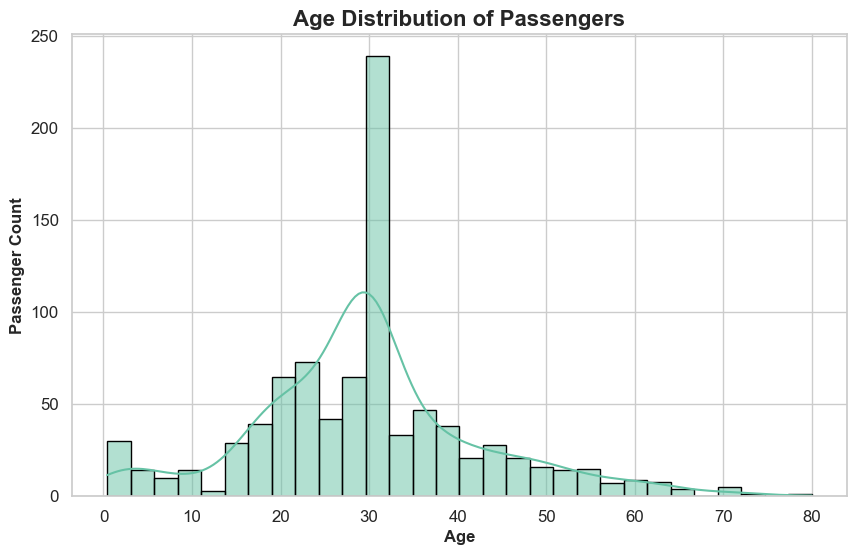

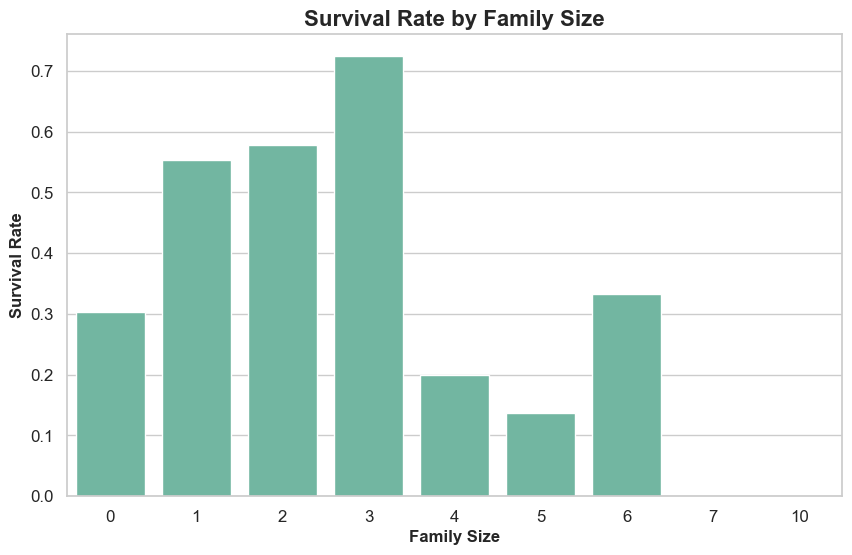

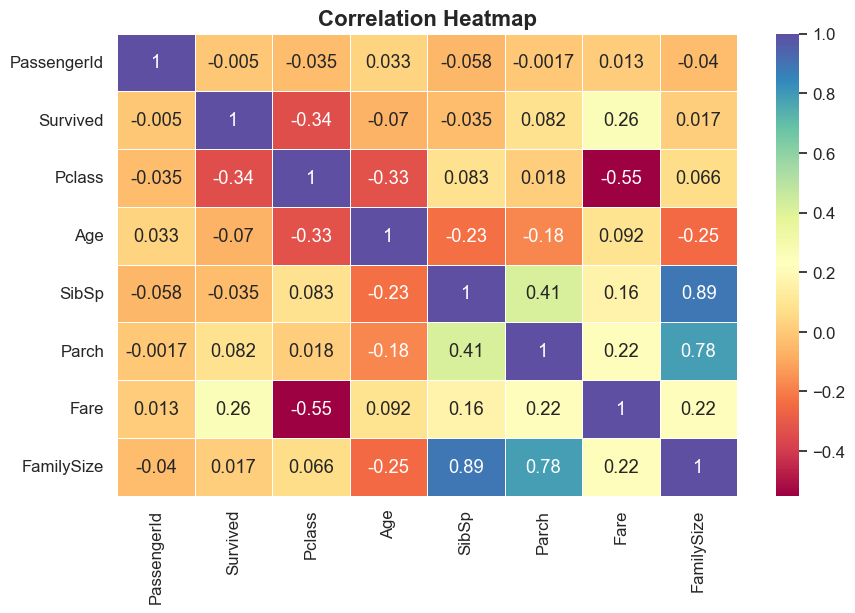

Key Insights:
- Children have higher survival rates.
- Small to medium families survived more.
- Fare is positively correlated with survival.
- All plots use a consistent colorful theme.

EDA Completed Successfully (No Warnings) ✅


In [ ]:
# ================================
# Titanic Mini EDA – Task 3
# Colorful Theme + Warning-Free
# ================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# GLOBAL THEME SETTINGS (SAME FOR ALL GRAPHS)
# ================================

sns.set_theme(
    style="whitegrid",
    palette="Set2",
    font_scale=1.1
)

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "axes.titleweight": "bold",
    "axes.labelweight": "bold"
})

# ================================
# LOAD DATA
# ================================

df = pd.read_csv("Titanic-Dataset.csv")

# ================================
# DATA CLEANING (PANDAS 3.0 SAFE)
# ================================

# Fill missing Age with mean (NO inplace)
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Fill missing Embarked with mode (NO inplace)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop irrelevant column
df = df.drop(columns=["Cabin"])

# ================================
# FEATURE ENGINEERING
# ================================

# Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"]

# Age Groups
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# ================================
# ANALYSIS (observed=False FIX)
# ================================

age_survival = df.groupby("AgeGroup", observed=False)["Survived"].mean()
embark_survival = df.groupby("Embarked")["Survived"].mean()
family_survival = df.groupby("FamilySize")["Survived"].mean()

# ================================
# VISUALIZATIONS (CONSISTENT COLORFUL THEME)
# ================================

# 1. Age Distribution
plt.figure()
sns.histplot(
    df["Age"],
    bins=30,
    kde=True,
    edgecolor="black"
)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.show()

# 2. Survival Rate by Family Size
plt.figure()
sns.barplot(
    x=family_survival.index,
    y=family_survival.values
)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

# 3. Correlation Heatmap
plt.figure()
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="Spectral",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()
